Цель - продемонстрировать подход, общие навыки и стиль мышления, а не количество или сложность кода/проверок/гипотез/моделей/признаков и т.д.


Откроем доступ к Гугл диску, куда я добавил таблицы

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Зададим путь и откроем таблицу products как датафрейм pandas

In [ ]:
import pandas as pd
import os

# Путь к файлу
file_path = '/content/drive/MyDrive/products.parquet'

# Открываем таблицу как датафрейм pandas
products = pd.read_parquet(file_path)

# Взглянем на первые 7 строк данных
products.head(7)

,product_id,category_lvl4,category_lvl5,category_lvl3,category_lvl2
0,1,1,1,1,1
1,2,2,2,2,1
2,3,3,3,1,1
3,4,3,3,1,1
4,5,3,4,1,1
5,6,3,4,1,1
6,7,2,5,2,1


Узнаем размер датафрейма

In [ ]:
products.size

1175

Узнаем количество пропусков

In [ ]:
nan_counts = products.isna().sum()
print(nan_counts)

product_id       0
category_lvl4    0
category_lvl5    0
category_lvl3    0
category_lvl2    0
dtype: int64


Переупорядочим стобцы для логичности

In [ ]:
products = products[['product_id', 'category_lvl5', 'category_lvl4', 'category_lvl3', 'category_lvl2']]


Узнаем размеры датафрейма

In [ ]:
rows, columns = products.shape

print(f"Размер таблицы: {rows} строк, {columns} столбцов")

Размер таблицы: 235 строк, 5 столбцов


Узнаем количество уникальных значений по столбцам

In [ ]:
unique_counts = products.nunique()
print(unique_counts)

product_id       235
category_lvl5     88
category_lvl4     46
category_lvl3      7
category_lvl2      1
dtype: int64


Вывод: у нас датафрейм из 235 уникальных товаров. Категоризируя их с детализацией уровня 2 (lvl2), авторы датафрейма получили 1 товарную группу, куда вошли все 235 товаров. На уровне 5 (lvl5) получилось уже 88 товарных групп (менее 3 товаров на товарную группу)

Таблица products довольно простая. Перейдем к таблице actions

In [ ]:
# Путь к файлу
file_path = '/content/drive/MyDrive/actions.parquet'

# Открываем таблицу как датафрейм pandas
actions = pd.read_parquet(file_path)

# Взглянем на первые 7 строк данных
actions.head(7)

,product_id,store_id,promo_id,promo_type1_id,promo_type2_id,promo_price,discount,promo_type3_id,date_from,date_to,sales_qty
0,1,1,1,1,3,79.980003,0.20,1,2024-01-01,2024-01-07,10502.0
1,1,1,2,1,3,89.980003,0.25,1,2024-01-08,2024-01-14,29638.0
2,1,1,3,1,3,99.980003,0.17,1,2024-02-19,2024-02-25,40510.0
3,1,2,4,1,1,69.980003,0.30,1,2023-02-27,2023-03-05,167316.0
4,1,2,5,1,3,69.980003,0.22,1,2023-03-06,2023-03-12,154093.0
5,1,2,6,1,1,49.990002,0.44,1,2023-03-13,2023-03-19,185394.0
6,1,2,7,1,3,59.990002,0.33,1,2023-03-20,2023-03-26,151059.0


Узнаем размер датафрейма

In [ ]:
actions.size

92059

Сколько пропусков по столбцам?

In [ ]:
nan_counts = actions.isna().sum()
print(nan_counts)

product_id        0
store_id          0
promo_id          0
promo_type1_id    0
promo_type2_id    0
promo_price       0
discount          0
promo_type3_id    0
date_from         0
date_to           0
sales_qty         4
dtype: int64


Сколько уникальных значений по столбцам?

In [ ]:
# Выбираем столбцы
columns_to_check = ['product_id', 'store_id', 'promo_id', 'promo_type1_id', 'promo_type2_id', 'promo_type3_id']

# Считаем уникальные значения
unique_counts = actions[columns_to_check].nunique()
print(unique_counts)

product_id        235
store_id            2
promo_id          116
promo_type1_id      4
promo_type2_id      6
promo_type3_id      2
dtype: int64


Количество products_id в датафреймах одинаковое. На всякий случай проверим, все ли id из первого датафрейма есть во втором датафрейме

In [ ]:
# Все ли product_id из products есть в actions?
all_present = products['product_id'].isin(actions['product_id']).all()

if all_present:
    print("Все product_id из products присутствуют в actions")
else:
    print("Не все product_id из products присутствуют в actions")

Все product_id из products присутствуют в actions


Проясним, какие значения принимают колонки, где указан тип промоакции

In [ ]:
columns_to_check = ['promo_type1_id', 'promo_type2_id', 'promo_type3_id']

for col in columns_to_check:
    unique_values = actions[col].dropna().unique()
    print(f"Колонка {col}")
    print(f"Уникальные значения: {sorted(unique_values)}")
    print()

Колонка promo_type1_id
Уникальные значения: [np.int32(1), np.int32(2), np.int32(5), np.int32(8)]

Колонка promo_type2_id
Уникальные значения: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6)]

Колонка promo_type3_id
Уникальные значения: [np.int32(1), np.int32(2)]



Узнаем, сколько промоакций было в 1 магазине, а сколько во втором

In [ ]:
# Для магазина с id = 1
count_store_1 = actions[actions['store_id'] == 1]['promo_id'].nunique()
print(f"Число уникальных promo_id для магазина 1: {count_store_1}")

# Для магазина с id = 2
count_store_2 = actions[actions['store_id'] == 2]['promo_id'].nunique()
print(f"Число уникальных promo_id для магазина 2: {count_store_2}")

Число уникальных promo_id для магазина 1: 116
Число уникальных promo_id для магазина 2: 116


Узнаем, какие диапазоны у других колонок

In [ ]:
# Статистика для трех числовых столбцов
print("Цены, скидки, количество единиц")
numeric_stats = actions[['promo_price', 'discount', 'sales_qty']].describe()
print(numeric_stats)

# Теперь по датам. Они указаны в формате object, надо преобразовать
print("\nЧто же касается дат")
for col in ['date_from', 'date_to']:
    dates = pd.to_datetime(actions[col], errors='coerce')
    print(f"{col}:")
    print(f"  Диапазон: {dates.min()} - {dates.max()}")


Цены, скидки, количество единиц
       promo_price     discount     sales_qty
count  8369.000000  8369.000000  8.365000e+03
mean    145.572891     0.221795  3.469284e+04
std     144.964966     0.112737  9.164882e+04
min      14.990000     0.000000  7.140000e-01
25%      79.980003     0.140000  5.138444e+03
50%      99.980003     0.210000  1.309180e+04
75%     169.899994     0.290000  3.303200e+04
max    1499.900024     0.690000  2.078527e+06

Что же касается дат
date_from:
  Диапазон: 2022-06-27 00:00:00 - 2024-07-29 00:00:00
date_to:
  Диапазон: 2022-07-03 00:00:00 - 2024-08-04 00:00:00


Выясним, не пересекаются ли сроки промо для пары товар-магазин

In [ ]:
# Создадим столбец пар product_id + store_id
actions['product_store'] = actions['product_id'].astype(str) + '_' + actions['store_id'].astype(str)

# Сгруппируем по уникальным парам product_store
grouped = actions.groupby('product_store')

# Проверка пересечения дат внутри группы
def has_overlap(df):
    # Сортируем по date_from
    df_sorted = df.sort_values('date_from')
    # Проверяем, пересекается ли следующий интервал с текущим
    for i in range(len(df_sorted) - 1):
        current_end = df_sorted.iloc[i]['date_to']
        next_start = df_sorted.iloc[i+1]['date_from']
        if next_start <= current_end:
            return True
    return False

# Применим has_overlap к каждой группе
overlap_results = grouped.apply(has_overlap).reset_index()
overlap_results.columns = ['product_store', 'has_overlap']

# Покажем пары, у которых есть пересечения
overlapping_pairs = overlap_results[overlap_results['has_overlap']]
print(overlapping_pairs)


    product_store  has_overlap
8           104_1         True
9           104_2         True
10          105_1         True
11          105_2         True
42           11_1         True
..            ...          ...
439          88_2         True
454          95_1         True
460          98_1         True
461          98_2         True
464           9_1         True

[79 rows x 2 columns]


/tmp/ipython-input-2198906336.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  overlap_results = grouped.apply(has_overlap).reset_index()


Выясним, сколько длились промо акции и в какие дни недели начинались/заканчивались

In [ ]:
# Изменим формат столбцов на datetime
actions['date_from'] = pd.to_datetime(actions['date_from'])
actions['date_to'] = pd.to_datetime(actions['date_to'])

# Создадим столбец продолжительности
actions['duration'] = (actions['date_to'] - actions['date_from']).dt.days + 1

# Создадим столбцы дней недели
actions['start_day'] = actions['date_from'].dt.day_name()
actions['end_day'] = actions['date_to'].dt.day_name()

# Выведем данные
print(" Длительность промоакции ")
print(f"Макс: {actions['duration'].max()} дней")
print(f"Медиана: {actions['duration'].median()} дней")
print(f"Среднее: {actions['duration'].mean():.1f} дней")

# Акцент на самых длинных промо
print(f"\n Самые продолжительные промоакции")
print(actions.nlargest(5, 'duration')[['promo_id', 'duration']])

# Дни недели
print(f"\n Дни недели")
print("Начало:")
print(actions['start_day'].value_counts())
print("\nОкончание:")
print(actions['end_day'].value_counts())

 Длительность промоакции 
Макс: 14 дней
Медиана: 7.0 дней
Среднее: 6.9 дней

 Самые продолжительные промоакции
     promo_id  duration
45         37        14
137        37        14
161        37        14
237        37        14
363        37        14

 Дни недели
Начало:
start_day
Monday       8177
Thursday       96
Friday         47
Wednesday      24
Tuesday        14
Sunday          7
Saturday        4
Name: count, dtype: int64

Окончание:
end_day
Sunday       8094
Thursday       92
Wednesday      69
Tuesday        60
Saturday       26
Friday         26
Monday          2
Name: count, dtype: int64


Вывод:

*   В таблице actions представлены те же товары, что и в таблице products
*   У нас всего 2 магазина
*   Цены - от 15 до 1500 долларов (с округлением)
*   Скидки от 0% до 69%
*   Количества проданных товаров достаточно большие, максимальное значение - свыше 2 млн. По-видимому, речь идет об очень больших магазинах
*   Было проведено 116 промо акций. Они категоризируются не совсем понятным образом. Судя по отсутствию пропусков, каждая промо акция относится одновременно к трем типам и в рамках каждого из них наделяется номером подтипа
*   Оба магазина провели 116 промоакций
*   Начало самой ранней акции 27 июня 2022, конец самой поздно завершившейся - 4 августа 2024
*   Средняя продолжительность промоакции 7 дней, максимальная 14 дней
*   Начинались промоакции как правило в понедельник, завершались как правило в воскресенье



Сделаем аналитическую витрину с применением PySpark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Создаем сессию spark
spark = SparkSession.builder.appName("AnalyticalMart").getOrCreate()

# Создаем датафреймы spark
actions_df = spark.createDataFrame(actions)
products_df = spark.createDataFrame(products)

# Теперь аналитическая витрина
# Объединим две таблицы
analytical_mart = (actions_df
    .join(products_df, "product_id", "left")

    # Агрегаты по товарам-магазинам
    .groupBy("product_id", "store_id")
    .agg(
        # По продажи
        F.sum("sales_qty").alias("total_sales"),

        # По метрикам промо
        F.count("promo_id").alias("promo_count"),
        F.mean("promo_price").alias("avg_promo_price"),
        F.mean("discount").alias("avg_discount"),
        F.mean("duration").alias("avg_duration"),

        # По макс. значениям продаж и длительности промо
        F.max("sales_qty").alias("max_sales"),
        F.max("duration").alias("max_duration"),
    )

    # Добавляем категории товаров
    # .join(products_df.select("product_id", "category_lvl2", "category_lvl3"), "product_id", "left")
)

# Результат
analytical_mart.show(10)
print(f"Размер витрины: {analytical_mart.count()} строк")


+----------+--------+------------------+-----------+------------------+-------------------+------------------+------------------+------------+
|product_id|store_id|       total_sales|promo_count|   avg_promo_price|       avg_discount|      avg_duration|         max_sales|max_duration|
+----------+--------+------------------+-----------+------------------+-------------------+------------------+------------------+------------+
|        26|       1|          305597.0|         46|58.422610739003055| 0.2682608689545937|7.1521739130434785|           16206.0|          14|
|        26|       2|          798504.0|         45| 58.61000205145942|0.27111111051506465| 7.155555555555556|           55473.0|          14|
|        29|       1|          244584.0|         16| 128.6799988746643|0.22999999951571226|               7.0|           29111.0|           7|
|        29|       2|          545093.0|         16| 128.6799988746643|0.22999999951571226|               7.0|           65338.0|           7|

Объединим два таблицы и подумаем над стратегией предсказания продаж

In [ ]:
combined = actions.merge(products, on='product_id', how='left')

Избавимся от ненужных колонок

In [ ]:
columns_to_drop = [
    'product_store',  # Технический признак
    'start_day',      # тип признака object, а лучше иметь числовые признаки
    'end_day',        # тип признака object, а лучше иметь числовые признаки
]

combined = combined.drop(columns=columns_to_drop, errors='ignore')


Выделим нужные нам временные признаки

In [ ]:
# Месяц и год промоакции
combined['promo_month'] = combined['date_from'].dt.month
combined['promo_year'] = combined['date_from'].dt.year

# Сезоны (кварталы)
combined['season'] = combined['date_from'].dt.quarter

# Дни недели в числовом виде
combined['start_day_num'] = combined['date_from'].dt.dayofweek
combined['end_day_num'] = combined['date_to'].dt.dayofweek

Данные о продажах в прошлом

In [ ]:
# Берем данные до 15 января 2024 года
combined_until_jan_2024 = combined[combined['date_from'] < '2024-01-15']

# Считаем средние продажи до 15 января 2024 года для каждой пары товар-магазин (среднее по промоакциям)
historical_avg_until_jan_2024 = combined_until_jan_2024.groupby(['product_id', 'store_id'])['sales_qty'].agg(['mean']).reset_index()
historical_avg_until_jan_2024.columns = ['product_id', 'store_id', 'historical_mean_sales_until_jan_2024']

# Объединяем с нашим датафреймом combined
combined = combined.merge(historical_avg_until_jan_2024, on=['product_id', 'store_id'], how='left')

# Учитываем число промоакций по товару до 15 января 2024 года
promo_frequency_until_jan_2024 = combined_until_jan_2024.groupby('product_id')['promo_id'].nunique().reset_index(name='total_promos_per_product_until_jan_2024')
combined = combined.merge(promo_frequency_until_jan_2024, on='product_id', how='left')

# Заполняем пропуски нулями (для товаров, которых не было в данных до 15 января 2024 года)
combined['total_promos_per_product_until_jan_2024'] = combined['total_promos_per_product_until_jan_2024'].fillna(0)

# Важный период: Новый год. Попадание промоакции в период 20-31 декабря будем считать важной деталью
combined['is_december_holiday_period'] = (
    ((combined['date_from'] <= '2023-12-31') & (combined['date_to'] >= '2023-12-20')) |
    ((combined['date_from'] <= '2022-12-31') & (combined['date_to'] >= '2022-12-20')) |
    ((combined['date_from'] <= '2021-12-31') & (combined['date_to'] >= '2021-12-20'))
).astype(int)

Удалим признаки, которые не имеет смысла с точки зрения оценки модели. И сделаем encoding ряда других признаков

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Удалим category_lvl2 (принимает всего 1 значение)
# Удалим promo_id (предположим, что может быть придумана новая промо акция с новым promo_id, поэтому удаляем это из данных)
# Даты сами по себе они полезной информации не несут, но удалим их позже, они понадобятся для разделения данных

columns_to_drop = ['category_lvl2', 'promo_id']
combined = combined.drop(columns=columns_to_drop)

# Делаем Mean Target Encoding для ряда признаков
def mean_target_encoding(df, columns, target='sales_qty'):
    df_encoded = df.copy()
    for col in columns:
        mean_encoding = df.groupby(col)[target].mean().to_dict()
        # Создаем новый столбец
        df_encoded[f'{col}_mean_encoded'] = df[col].map(mean_encoding)
        # Удаляем изначальный столбец, КРОМЕ category_lvl3
        if col != 'category_lvl3':
            df_encoded = df_encoded.drop(columns=[col])
    return df_encoded

# Применяем mean target encoding
encoding_columns = ['product_id', 'category_lvl5', 'category_lvl4', 'category_lvl3']
combined = mean_target_encoding(combined, encoding_columns, target='sales_qty')

# One-Hot Encoding для ряда других признаков (которые принимают не много значений)
def one_hot_encoding(df, columns):
    df_encoded = df.copy()
    for col in columns:
        # Создаем dummy (индикаторы)
        dummies = pd.get_dummies(df[col], prefix=col, prefix_sep='_')
        # Добавляем их к нашему датафрейму
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        # Удаляем изначальный столбец
        df_encoded = df_encoded.drop(columns=[col])
    return df_encoded

# Применяем one-hot encoding
one_hot_columns = ['promo_type1_id', 'promo_type2_id', 'promo_type3_id', 'store_id']
combined = one_hot_encoding(combined, one_hot_columns)

In [ ]:
unique_combinations = combined[['category_lvl3', 'category_lvl3_mean_encoded']].drop_duplicates()
unique_combinations.head(10)

,category_lvl3,category_lvl3_mean_encoded
0,1,44903.849070
13,2,16421.130678
89,3,65972.274287
91,4,44485.769231
142,5,13842.189830
170,6,16403.407053
267,7,2248.863536


Теперь, когда мы знаем, как категории на уровне детализации 3 закодированы, можно удалять столбец category_lvl3

In [ ]:
combined = combined.drop('category_lvl3', axis=1)

Гипотезы (вкратце)

*   Чем ниже цена, тем выше продажи
*   Чем больше процент скидки, тем выше продажи, даже при одной и той же цене (психологически люди больше готовы покупать, видя, что скидка большая)
*   Чем длиннее акция, тем больше успеют купить
*   Имеют место временные колебания, поэтому важно учесть сезон, день недели и так далее
*   Чем больше были продажи в прошлом, тем больше при прочих равных они будут в будущем
*   Чем больше на товар было акций в прошлом, тем более невосприимчивы к ним стали покупатели
*   Перед новогодними праздниками все товары покупаются в большем количестве, чем в непраздничные периоды
*   Также есть индивидуальные эффекты товара, типа промоакции, магазина

Выделяем данные за апрель 2024, они позже пригодятся для тестирования

In [ ]:
april_2024 = combined[
    (combined['date_from'].dt.year == 2024) &
    (combined['date_from'].dt.month == 4)
].copy()

april_2024 = april_2024.drop(['date_from', 'date_to'], axis=1)

X_april_2024 = april_2024.drop('sales_qty', axis=1)
y_april_2024 = april_2024['sales_qty']

Разделим данные на те, на которых будет оцениваться модель, и на февральские

In [ ]:
# Выделяем обучающую выборку train (до середины января 2024)
# И выборку february (все промо, которые начинаются на февральских неделях)
train = combined[combined['date_from'] < '2024-01-15'].copy()
february = combined[(combined['date_from'] >= '2024-02-01') & (combined['date_from'] <= '2024-02-29')].copy()

# Создаем X_train, y_train
X_train = train.drop('sales_qty', axis=1)
y_train = train['sales_qty']

# Фактически тестовой выборкой у нас будет выборка с февральскими акциями
X_test = february.drop('sales_qty', axis=1)
y_test = february['sales_qty']

# Отсортируем по дате
train = train.sort_values('date_from')

# Теперь удалим ставшие ненужными признаки дат из тренировочных данных и февральских данных
X_train = X_train.drop(['date_from', 'date_to'], axis=1)
X_test = X_test.drop(['date_from', 'date_to'], axis=1)

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Предобработка данных
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())

X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())

# Набор параметров
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

# TimeSeriesSplit на заранее отсортированных (по времени) данных
splitter = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=splitter,
    scoring='neg_mean_squared_error',
    verbose=1
)

grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f"Best params: {best_params}")

# Итоговая оценка на тестовых данных
final_model = grid_search.best_estimator_
y_pred_test = final_model.predict(X_test)

# Показатели качества
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Для себя: метрики на тренир данных
y_pred_train = final_model.predict(X_train)
print(f"\nТренир результаты (для сравнения):")
print(f"R²: {r2_score(y_train, y_pred_train):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
MAE: 15743.5001
RMSE: 41478.5976
R²: 0.6825

Тренир результаты (для сравнения):
R²: 0.9933
MAE: 2827.2587
RMSE: 7980.6045


Изобразим дерево

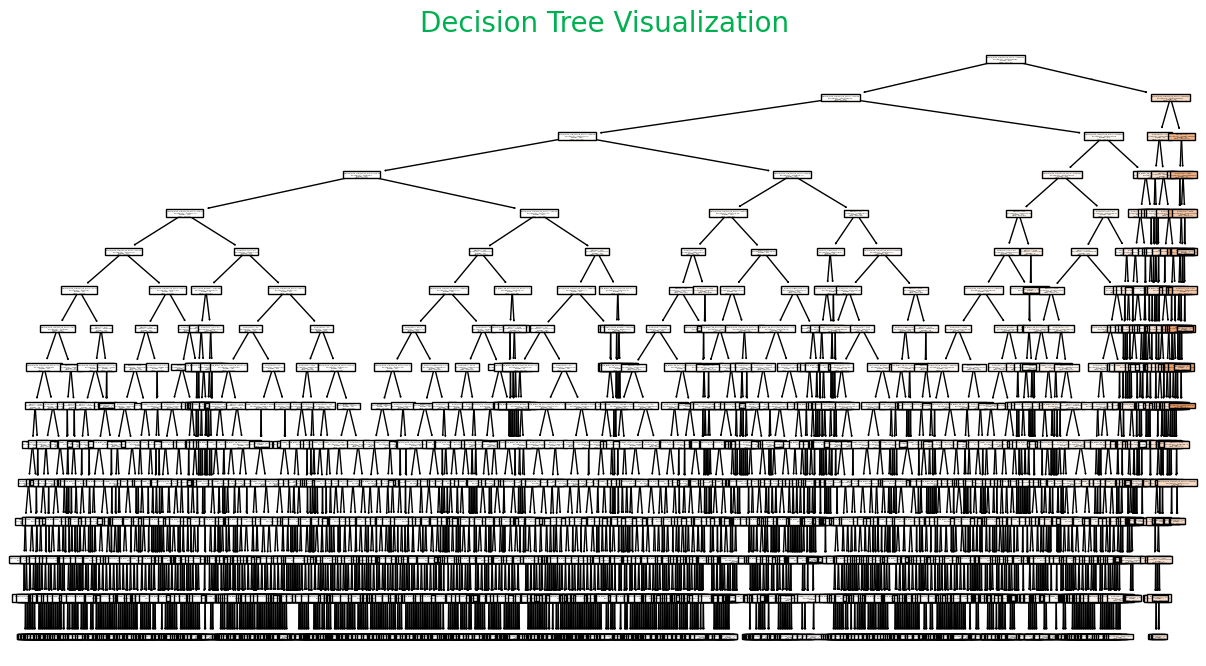

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib as mlp

# Для красоты сделаем цвет шрифта зеленым
mlp.rcParams['axes.titlecolor'] = '#00B050'

fig = plt.figure(figsize=(15, 8))
tree.plot_tree(final_model, filled=True, feature_names=X_train.columns.tolist())
plt.title("Decision Tree Visualization")
plt.show()

Теперь сравним прогноз с фактом с помощью метрик WAPE и BIAS за апрель 2024 на уровне category_lvl3

In [ ]:
# Предобработка на всякий случай
X_april_2024 = X_april_2024.fillna(X_april_2024.mean())
y_april_2024 = y_april_2024.fillna(y_april_2024.mean())

# Делаем наш прогноз
y_pred_april = final_model.predict(X_april_2024)

# Метрики качества выбираем
def bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

def wape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))

# Общие метрики по всему апрелю рассматриваемого года
april_bias = bias(y_april_2024, y_pred_april)
april_wape = wape(y_april_2024, y_pred_april)

print("Общие метрики за апрель 2024:")
print(f"BIAS: {april_bias:.4f}")
print(f"WAPE: {april_wape:.4f}")


print("\nМЫ ПОМНИМ, ЧТО:")
print(unique_combinations.to_string(index=False))

# Непосредственно на уровне category_lvl3
april_results = X_april_2024.copy()
april_results['actual_sales'] = y_april_2024
april_results['predicted_sales'] = y_pred_april
april_results['category_lvl3'] = april_results['category_lvl3_mean_encoded']

# Группировка по category_lvl3 и расчет метрик
category_metrics = april_results.groupby('category_lvl3').apply(
    lambda x: pd.Series({
        'bias': bias(x['actual_sales'], x['predicted_sales']),
        'wape': wape(x['actual_sales'], x['predicted_sales']),
        'actual_total': x['actual_sales'].sum(),
        'predicted_total': x['predicted_sales'].sum(),
        'promo_count': len(x)
    })
).reset_index()

# Статистика по метрикам по категориям
print(f"\nСтатистика по категориям:")
print(f"BIAS - Среднее: {category_metrics['bias'].mean():.4f}, Std: {category_metrics['bias'].std():.4f}")
print(f"WAPE - Среднее: {category_metrics['wape'].mean():.4f}, Std: {category_metrics['wape'].std():.4f}")

# Категории с лучшими и худшими результатами
best_wape = category_metrics.nsmallest(3, 'wape')
worst_wape = category_metrics.nlargest(3, 'wape')

print(f"\nЛучшие категори (по WAPE):")
for idx, row in best_wape.iterrows():
    print(f"Категория {row['category_lvl3']:.4f}: WAPE={row['wape']:.4f}")

print(f"\nХудшие категории (по WAPE):")
for idx, row in worst_wape.iterrows():
    print(f"Категория {row['category_lvl3']:.4f}: WAPE={row['wape']:.4f}")

# Итоговая таблица результатов
print(f"\nПодведем итог:")
print(f"Общий BIAS за апрель: {april_bias:.4f}")
print(f"Общий WAPE за апрель: {april_wape:.4f}")
print(f"Средний WAPE по категориям: {category_metrics['wape'].mean():.4f}")
print(f"Медианный WAPE по категориям: {category_metrics['wape'].median():.4f}")

Общие метрики за апрель 2024:
BIAS: -736.1605
WAPE: 0.5043

МЫ ПОМНИМ, ЧТО:
 category_lvl3  category_lvl3_mean_encoded
             1                44903.849070
             2                16421.130678
             3                65972.274287
             4                44485.769231
             5                13842.189830
             6                16403.407053
             7                 2248.863536

Статистика по категориям:
BIAS - Среднее: -2041.2007, Std: 3479.7187
WAPE - Среднее: 0.5097, Std: 0.1627

Лучшие категори (по WAPE):
Категория 16403.4071: WAPE=0.2763
Категория 65972.2743: WAPE=0.4175
Категория 13842.1898: WAPE=0.4741

Худшие категории (по WAPE):
Категория 2248.8635: WAPE=0.7184
Категория 16421.1307: WAPE=0.6665
Категория 44903.8491: WAPE=0.5052

Подведем итог:
Общий BIAS за апрель: -736.1605
Общий WAPE за апрель: 0.5043
Средний WAPE по категориям: 0.5097
Медианный WAPE по категориям: 0.4897


/tmp/ipython-input-1480945415.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_metrics = april_results.groupby('category_lvl3').apply(


Факторы, повлиявшие на качество прогноза

Можно назвать следующие положительные факторы:

*   Такие временные признаки, как месяц, день недели позволили учесть сезонность, периодические колебания продаж
*   По промо-акциям: размер скидки, длительность, цена это важнейшие признаки, и важно, что мы ими располагали
*   Знание категорий товаров позволило сделать encoding и дало важную информацию и т.д.

Ограничивающие факторы:

Не было данных о:

*   Конкурентных предложения, акциях
*   Общеэкономическом состоянии (колебаниях покупательской способности и т.д.)
*   Погодных условиях
*   Праздничных днях (не было понимания, о какой стране речь)
*   Остатках на складе (если все закончилось, то даже при низкой цене будут, очевидно, нулевые продажи)

Также повлияло на качество:

*   Временные разрывы - модель обучалась на данных до января, а тестировалась на статистике по февралю и апрелю

Дополнение имеющихся датафреймов указанными признаками и поставновка задачи, которая бы не предполагала временные разрывы, могли бы стать шагами к улучшению прогнозов

Также было бы полезно перейти от предсказания суммарных продаж в течение той или иной промоакции к предсказанию продаж в расчете на один день промоакции, так как продолжительность акций неодинакова